In [13]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx
import sklearn.model_selection as sklm

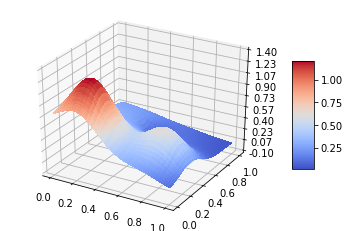

In [75]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))
design      = fx.DesignDesign(x,y,5)

x, y        = np.meshgrid(x,y)
noise_level = 0.0


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


This is not a nice way of plotting the data, do you know any better display methods? Preferably less grainy.

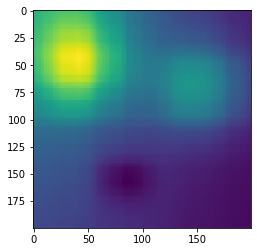

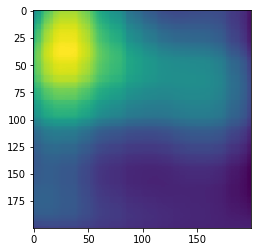

In [77]:
beta_ols   = fx.OridinaryLeastSquares(design,np.ravel(frank))
frank_pred = design @ beta_ols

pred = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))


plt.imshow(frank, label='test')
plt.show()


plt.imshow(pred, label='pred')
plt.show()



In [ ]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design,np.ravel(frank))


beta_ols   = fx.OridinaryLeastSquares(x_train,frank_train)
frank_pred = x_test @ beta_ols

pred = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()
